# Project - Data Science

## Fullname (nickname): Supadit Wanotayapitak (MINK)


## Project Topic: I wanna be a Tiktok Star☆

---
## Current Situation / Problem Statement

My Tiktok followers stop growing around 9,xxx for a couple of months






## Objectives:
1. Increase Engagement from active followers (like, comment, share)
2. Reach out new followers

## Hypothesis-driven Questions:


1.  Users are drawn by certain kind of content
2.  Either Video or Live is better for new followers
3.  There are Days of the week or period of the day that users are more active 



## Dataset:
Data from Tiktok Analytics 

In [2]:
#import important libaries and csv files.
import pandas as pd
import matplotlib.pyplot as plt
ld = pd.read_csv('./Last 60 Days.csv')
li = pd.read_csv('./Live_interaction.csv')
fa = pd.read_csv('./Follower activity.csv')
tv = pd.read_csv('./Trending videos.csv')
tf = pd.read_csv('./Total followers.csv')


## Data Preparation (Data Cleaning):


1. All datas from Tiktok Analytics are completed
2. Merge DataFrame of "Last 60 Days" & "Live_interaction" for comparison

### Merge "Last 60 Days.csv", "Live_interaction.csv", and "Total Followers.csv" for comparison


In [2]:
#The table below are Video Data, Live Data, and Difference in followers from previous day (DFPD)

# merge ld and li first
ld_li = pd.merge(ld, li, how ='left', left_index = True , right_index = True)

# then merge ld_li with tf
complete = pd.merge(ld_li, tf, how ='left', left_index = True , right_index = True)
complete.head()

#              [Videos Data]           ||               [Live Data]                   ||              [DFPD]   


,Date_x,Video views,Profile views,Likes_x,Comments,Shares_x,Date_y,New followers,Viewers who commented,Likes_y,Shares_y,Date,Followers,Difference in followers from previous day
0,20/6/2022,180,3,44,0,1,20/6/2022,0,0,0,0,20/6/2022,9790,1
1,21/6/2022,318,15,11,3,0,21/6/2022,0,0,0,0,21/6/2022,9791,1
2,22/6/2022,390,6,20,0,0,22/6/2022,0,0,0,0,22/6/2022,9791,0
3,23/6/2022,77,0,2,0,0,23/6/2022,0,0,0,0,23/6/2022,9790,-1
4,24/6/2022,83,3,3,0,2,24/6/2022,0,0,0,0,24/6/2022,9792,2


## Visualization of Followers (20/6/22 - 17/8/22)

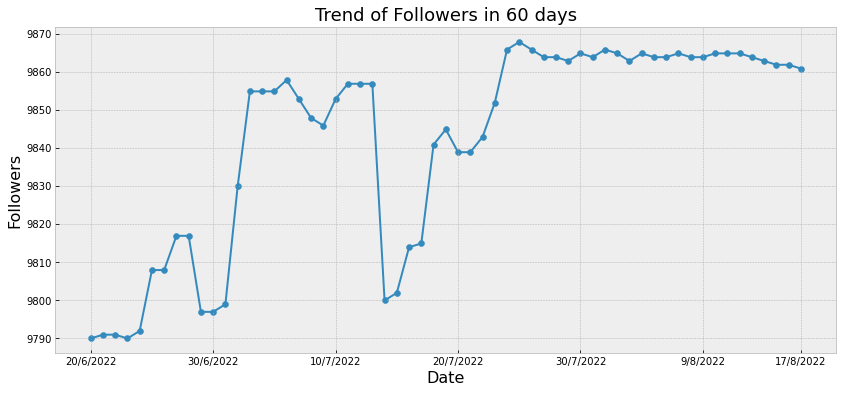

In [27]:
#set x axis, and y axis
plt.style.use('bmh')
plt.figure(figsize=(14,6))
x = tf['Date']
y = tf['Followers']
#Line graph
plt.title("Trend of Followers in 60 days", size = 18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Followers', fontsize=16)
plt.scatter(x, y)
plt.plot(x, y)
plt.xticks([0,10,20,30,40,50,58], rotation=0)
plt.show()

From chart above you can see that followers increase and decrease through the course of time, but stop moving after 35th position  or 24/7/22

## Exploratory Data Analysis (EDA):

1. Sort Video from Greater comments to Lower comments
2. Sort New followers from Live
3. Sort Followers activity

#### Find mean value in Comments, Views, Likes, and Followers gain for further comparison

In [4]:
#I put mean value in string before print it out in 
#Three Two One Boom!!!

Three = complete['Video views'].mean()
Two = complete['Likes_x'].mean()
One =complete['Comments'].mean()
Boom = complete['Difference in followers from previous day'].mean()

print(f'Mean Video views is ', Three)
print(f'Mean Likes is ', Two)
print(f'Mean Comments is ', One)
print(f'Mean DFPD is ', Boom)

Mean Video views is  1134.8305084745762
Mean Likes is  54.355932203389834
Mean Comments is  4.559322033898305
Mean DFPD is  1.2203389830508475


#### Sort Video with Higher Comments → Lower comments

In [5]:
#Show only top 5 rows.
complete.sort_values('Comments', ascending=False).head(5)

,Date_x,Video views,Profile views,Likes_x,Comments,Shares_x,Date_y,New followers,Viewers who commented,Likes_y,Shares_y,Date,Followers,Difference in followers from previous day
34,24/7/2022,1197,25,120,62,0,24/7/2022,4,4,1486,3,24/7/2022,9866,14
24,14/7/2022,714,22,44,13,0,14/7/2022,19,19,7575,14,14/7/2022,9800,-57
9,29/6/2022,328,13,23,13,0,29/6/2022,7,10,4245,2,29/6/2022,9797,-20
26,16/7/2022,2251,47,87,12,3,16/7/2022,8,11,4699,3,16/7/2022,9814,12
28,18/7/2022,40185,263,1837,11,4,18/7/2022,8,24,6062,7,18/7/2022,9841,26


After sorting, we have to calculate New followers from Video by formula below 

New followers from Video = DFPD - New followers(Live) 

In [6]:
#Add Sum column for New followers from Video
complete['Sum'] = complete['Difference in followers from previous day'] - complete[' New followers']
complete['Followers/Comments'] = complete['Sum'] / complete['Comments']
complete.sort_values('Comments', ascending=False).head(5)
# As a reminder, my Mean DFPD is 1.22

,Date_x,Video views,Profile views,Likes_x,Comments,Shares_x,Date_y,New followers,Viewers who commented,Likes_y,Shares_y,Date,Followers,Difference in followers from previous day,Sum,Followers/Comments
34,24/7/2022,1197,25,120,62,0,24/7/2022,4,4,1486,3,24/7/2022,9866,14,10,0.161290
24,14/7/2022,714,22,44,13,0,14/7/2022,19,19,7575,14,14/7/2022,9800,-57,-76,-5.846154
9,29/6/2022,328,13,23,13,0,29/6/2022,7,10,4245,2,29/6/2022,9797,-20,-27,-2.076923
26,16/7/2022,2251,47,87,12,3,16/7/2022,8,11,4699,3,16/7/2022,9814,12,4,0.333333
28,18/7/2022,40185,263,1837,11,4,18/7/2022,8,24,6062,7,18/7/2022,9841,26,18,1.636364


After tracking Videos in the Tiktok account from Date since there are more than one video in several days

We got these three videoes:

1)https://www.tiktok.com/@corymink/video/7123157066981592347?is_from_webapp=1&sender_device=pc&web_id=7128764110100137474
2)https://www.tiktok.com/@corymink/video/7120842999503801627?is_from_webapp=1&sender_device=pc&web_id=7128764110100137474
3)https://www.tiktok.com/@corymink/video/7121582827614768411?is_from_webapp=1&sender_device=pc&web_id=7128764110100137474

After checking, they are all dirty joke videos.

Followers/Comments Ratios are for comparing with the Live performance

#### Sort New followers from Live with Higher Comments → Lower comments

In [7]:
#Show only top 5 rows.
complete.sort_values('Viewers who commented', ascending=False).head(5)

,Date_x,Video views,Profile views,Likes_x,Comments,Shares_x,Date_y,New followers,Viewers who commented,Likes_y,Shares_y,Date,Followers,Difference in followers from previous day,Sum,Followers/Comments
28,18/7/2022,40185,263,1837,11,4,18/7/2022,8,24,6062,7,18/7/2022,9841,26,18,1.636364
24,14/7/2022,714,22,44,13,0,14/7/2022,19,19,7575,14,14/7/2022,9800,-57,-76,-5.846154
33,23/7/2022,1541,26,59,11,5,23/7/2022,4,18,6063,10,23/7/2022,9852,9,5,0.454545
32,22/7/2022,703,10,18,7,0,22/7/2022,2,15,4583,7,22/7/2022,9843,4,2,0.285714
45,4/8/2022,250,6,11,1,0,4/8/2022,2,14,6055,13,4/8/2022,9865,2,0,0.000000


In [16]:
#Add Sum column for New followers from Live
complete['Followers/Comments'] = complete[' New followers'] / complete['Viewers who commented']
complete.sort_values('Comments', ascending=False).head(5)

,Date_x,Video views,Profile views,Likes_x,Comments,Shares_x,Date_y,New followers,Viewers who commented,Likes_y,Shares_y,Date,Followers,Difference in followers from previous day,Sum,Followers/Comments
34,24/7/2022,1197,25,120,62,0,24/7/2022,4,4,1486,3,24/7/2022,9866,14,10,1.000000
24,14/7/2022,714,22,44,13,0,14/7/2022,19,19,7575,14,14/7/2022,9800,-57,-76,1.000000
9,29/6/2022,328,13,23,13,0,29/6/2022,7,10,4245,2,29/6/2022,9797,-20,-27,0.700000
26,16/7/2022,2251,47,87,12,3,16/7/2022,8,11,4699,3,16/7/2022,9814,12,4,0.727273
28,18/7/2022,40185,263,1837,11,4,18/7/2022,8,24,6062,7,18/7/2022,9841,26,18,0.333333


It seems like Live has a better Followers/Comments ratio since, there are pairs of 1.0 and 0.7 ratio

#### Sort followers activity by Hour

In [9]:
fa.sort_values('Active followers', ascending=False).head(10)

,Date,Hour,Active followers
44,2022-08-11,21,1575
164,2022-08-16,21,1571
20,2022-08-10,21,1548
140,2022-08-15,21,1522
68,2022-08-12,21,1500
139,2022-08-15,20,1498
188,2022-08-17,21,1498
92,2022-08-13,21,1478
116,2022-08-14,21,1477
19,2022-08-10,20,1475


After checking the calendar, day of the week doesn't really matters for posting video or doing Live

We can only focus on 21 pm which will be tested with Video and Live later on to see that Video or Live

could do better around this period of time.

## Key Findings:

### Comments are used as an indicator for follower's interest 
1. Dirty joke videoes are popular!!!
2. Live attaches new followers better thann videoes
3. Followers are active during 21.00 PM throughout the week.

<div class="alert alert-info">
<h3>What’s Next / Recommendation:</h3>
</div>

1. Focus more on Live
2. Dirty jokes are recommended
3. Post a video or Live around 21.00 PM everyday (need further investigation)

<div class="alert alert-info">
<h3>Financial Benefit:</h3>
</div>

1. 10,000 followers will unlock Gifting system
2. More followers increases chances for sponsorship from other companies

<div class="alert alert-info">
<h3>Non-Financial Benefit:</h3>
</div>

1. Gain more popularity on Tiktok platform
2. Make more fiends on Tiktok community

<div class="alert alert-info">
<h3>Testing:</h3>
</div>

I tested out my keywword finding which are 'dirty joke' and '9 PM'
<h4>My hypothesis</h4>
'Dirty joke' is easy to understand and some experts say that humor is based on incongruity and saying taboo things are incongruity itself. In the other hand, '9 PM' is when people are ready to sleep, resting, having late diinner, etc. The point is they are free around this period of time and people always scroll their phone in their free-time which make it perfect for grasping this possibility.